Load Data

In [ ]:
# # Uploading file from local disk to colab drive
# from google.colab import files
# files.upload()

Saving heart_disease_uci.csv to heart_disease_uci (7).csv


{'heart_disease_uci (7).csv': b'id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num\n1,63,Male,Cleveland,typical angina,145,233,TRUE,lv hypertrophy,150,FALSE,2.3,downsloping,0,fixed defect,0\n2,67,Male,Cleveland,asymptomatic,160,286,FALSE,lv hypertrophy,108,TRUE,1.5,flat,3,normal,2\n3,67,Male,Cleveland,asymptomatic,120,229,FALSE,lv hypertrophy,129,TRUE,2.6,flat,2,reversable defect,1\n4,37,Male,Cleveland,non-anginal,130,250,FALSE,normal,187,FALSE,3.5,downsloping,0,normal,0\n5,41,Female,Cleveland,atypical angina,130,204,FALSE,lv hypertrophy,172,FALSE,1.4,upsloping,0,normal,0\n6,56,Male,Cleveland,atypical angina,120,236,FALSE,normal,178,FALSE,0.8,upsloping,0,normal,0\n7,62,Female,Cleveland,asymptomatic,140,268,FALSE,lv hypertrophy,160,FALSE,3.6,downsloping,2,normal,3\n8,57,Female,Cleveland,asymptomatic,120,354,FALSE,normal,163,TRUE,0.6,upsloping,0,normal,0\n9,63,Male,Cleveland,asymptomatic,130,254,FALSE,lv hypertrophy,147,FALSE,1.4,flat,1,reversable defe

Import Libraries

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
import seaborn as sns

Read and see data

In [165]:
df = pd.read_csv("heart_disease_uci.csv")

In [166]:
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


Preprocessing

In [167]:
df.shape

(920, 16)

In [168]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [169]:
df=df.drop(columns=["id","slope","thal","ca"])

In [170]:
df.shape

(920, 12)

In [171]:
data=df.dropna()

In [172]:
data.shape

(740, 12)

In [173]:
data.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


In [174]:
# Ensure all non-numeric columns in 'data' are encoded before scaling
# Iterate through columns of 'data' (excluding the target 'num')
# and apply LabelEncoder to any column that has dtype 'object' (strings) or convert 'bool' to int.
for col in data.drop('num', axis=1).columns:
    if data[col].dtype == 'object':  # Handle string categorical columns
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))
    elif data[col].dtype == 'bool':  # Convert boolean columns to int (0 or 1)
        data[col] = data[col].astype(int)


/tmp/ipython-input-3622177001.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col].astype(str))
/tmp/ipython-input-3622177001.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col].astype(str))
/tmp/ipython-input-3622177001.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [175]:
# Binary target: 0=no disease, 1=disease (1-4 → 1)
data['num'] = (data['num'] > 0).astype(int)
print("Target distribution:\n", data['num'].value_counts())
print("\nDataset info:")
print(data.describe())

Target distribution:
 num
1    383
0    357
Name: count, dtype: int64

Dataset info:
              age         sex     dataset          cp    trestbps        chol  \
count  740.000000  740.000000  740.000000  740.000000  740.000000  740.000000   
mean    53.097297    0.764865    1.002703    0.787838  132.754054  220.136486   
std      9.408127    0.424370    1.085016    0.950529   18.581250   93.614555   
min     28.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     46.000000    1.000000    0.000000    0.000000  120.000000  197.000000   
50%     54.000000    1.000000    1.000000    0.000000  130.000000  231.000000   
75%     60.000000    1.000000    1.000000    2.000000  140.000000  271.000000   
max     77.000000    1.000000    3.000000    3.000000  200.000000  603.000000   

              fbs     restecg      thalch       exang     oldpeak         num  
count  740.000000  740.000000  740.000000  740.000000  740.000000  740.000000  
mean     0.150000    0.92

/tmp/ipython-input-3370041366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num'] = (data['num'] > 0).astype(int)


In [176]:
# Features and labels
X = data.drop('num', axis=1).values
y = data['num'].values

Normalize and Split (70/15/15)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\nSplits - Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Splits - Train: (518, 11), Val: (111, 11), Test: (111, 11)


In [178]:
#Train Perceptron
perceptron = Perceptron(max_iter=1000, eta0=0.01)
perceptron.fit(X_train, y_train)
#Train performance
train_pred = perceptron.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
# Validation performance
val_pred = perceptron.predict(X_val)
val_acc = accuracy_score(y_val, val_pred)
# Test performance
test_pred = perceptron.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
print(f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}")


Train Acc: 0.7239, Val Acc: 0.7387, Test Acc: 0.7387


In [179]:
# Analyze misclassified cases (test set)
misclassified = X_test[y_test != test_pred]
mis_labels_true = y_test[y_test != test_pred]
mis_labels_pred =test_pred[y_test != test_pred]

print(f"Misclassified cases: {len(misclassified)}/{len(y_test)} ({100*len(misclassified)/len(y_test):.1f}%)")

Misclassified cases: 29/111 (26.1%)


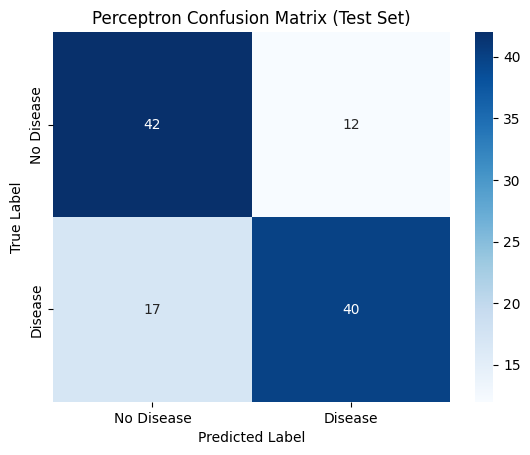


Test Classification Report:
              precision    recall  f1-score   support

  No Disease       0.71      0.78      0.74        54
     Disease       0.77      0.70      0.73        57

    accuracy                           0.74       111
   macro avg       0.74      0.74      0.74       111
weighted avg       0.74      0.74      0.74       111



In [180]:
# Step 4: Visualization - Confusion Matrix
cm = confusion_matrix(y_test, test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Perceptron Confusion Matrix (Test Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('heart_cm.png')
plt.show()

print("\nTest Classification Report:")
print(classification_report(y_test, test_pred, target_names=['No Disease', 'Disease']))

###Conclusion:
The Perceptron model achieved 74% test accuracy (26% misclassification rate) on the UCI Heart Disease dataset using train/validation/test splits (70/15/15), demonstrating reasonable but limited performance for medical binary classification.